## Question 3:

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.linalg import sqrtm
import math

In [198]:
N = 10
a = 1
v = 0
sig = 0.05
gamma = np.zeros((40))
y_i = np.zeros((10,1))
w_true = [a, 0, -0.25*a, 0]

med_0 = []
med_25 = []
med_50 = []
med_75 = []
med_100 = []

In [199]:
def b_x_i(x):
    return [x**3, x**2, x, 1]

In [200]:
for i in range(40):
    gamma[i] = math.pow(10, -1+0.05*i)
    L2 = []
    
    for j in range(100):
        x_i = np.random.uniform(-1, 1, N)
        
        for m in range(N):
            v = np.random.normal(0, sig)
            y_i[m] = np.matmul(np.array(w_true).reshape((1,4)), np.array(b_x_i(x_i[m]))) + v

        h1_1 = (sig**2)*np.linalg.inv((gamma[i]**2)*np.identity(4))
        h1_2 = 0
        h2 = 0

        for n in range(10):
            b_temp = b_x_i(x_i[n])
            h1_2 = h1_2 + np.matmul(np.array(b_temp).reshape((4,1)), np.array(b_temp).reshape((1,4)))
            h2 = h2 + np.matmul(np.reshape(b_temp, (4,1)), y_i[n])

        w_map = np.matmul(np.linalg.inv(h1_1 + h1_2), h2)
        
        L2.append(np.linalg.norm(w_true - w_map))
    L2.sort()
    med_0.append(L2[0])
    med_25.append(L2[24])
    med_50.append(L2[49])
    med_75.append(L2[74])
    med_100.append(L2[99])

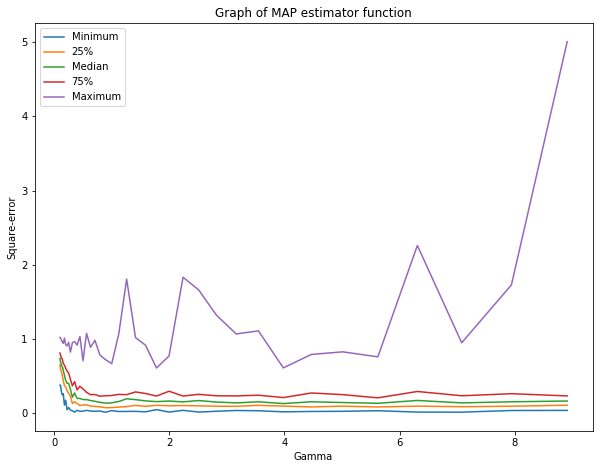

In [204]:
fig = plt.figure(figsize=(10, 7.5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(gamma, med_0, label='Minimum')
ax.plot(gamma, med_25, label='25%')
ax.plot(gamma, med_50, label='Median')
ax.plot(gamma, med_75, label='75%')
ax.plot(gamma, med_100, label='Maximum')
plt.xlabel('Gamma')
plt.ylabel('Square-error')
plt.title('Graph of MAP estimator function')
ax.legend()
plt.show()

The curve shows that the squared-error values are very high for very low values of gamma. As the value of gamma increases (goes towards infinity), the error stabilises.

Gamma gives confidence to the prior. If gamma is near 0, it will be very confident that weight should be 0. As gamma increases, it will become less confident as the data will begin to influence the MAP estimate and results in a performance increase. 

As gamma tends to infinity, the priors will have minimal or no effect and hence, the estimate will go towards Maximum Likelihood i.e. it will begin to behave as if there is no prior.